In [5]:
# !pip install networkx
# !pip install matplotlib
# !pip install tqdm
# !pip install seaborn

In [56]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, groupby
import seaborn as sns
import matplotlib.pyplot as plt

# Лабораторна робота №1


### Семсічко Лідія та Пахолок Віктор


У лабораторній роботі №1 нам потрібно було закодити 4 алгоритми: Крускала, Прима, Белмана-Форда та Флойда-Воршала. А потім порівняти результати та час виконання з вбудованим алгоритмом пошуку мінімальних шляхів та каркасів.

---------------------------------------------------------------------------

In [57]:
# генерується граф
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """

    
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)
                
    if draw: 
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
            
        else:
            nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
        
    return G

In [58]:
G = gnp_random_connected_graph(20, 1, False, False) #задаються параметри графу

# For Task 1

## Kruskal's algorithm

In [59]:
from networkx.algorithms import tree

In [60]:
mstk = tree.minimum_spanning_tree(G, algorithm="kruskal")

In [61]:
# nx.draw(mstk, node_color='lightblue', 
#         with_labels=True, 
#         node_size=400)

In [62]:
def sorting(pair): # функція для сортування пар за вагами ребер
    return G.adj[pair[0]][pair[1]]['weight']

def kruskala(G):
    sorted_coordinates = sorted(G.edges(), key=lambda pair:sorting(pair))
    vertex = G.nodes()

    used_ways = [] # використанні шляхи, щоб не було циклів
    used_vertex = [] # використанні вершини
    karkasK = [] # мінімальний каркас
    karkasK_weight = 0 # вага мінімального каркасу

    for pair in sorted_coordinates:
        danger = 0
        if pair[0] not in used_vertex and pair[1] not in used_vertex: # перевіряє чи є вершини в стеці використаних
            used_vertex.append(pair[0]) # додає обидві
            used_vertex.append(pair[1])
            used_ways.append([pair[0], pair[1]]) # додає пару в використанні шляхи ( для уникнення циклів )
            karkasK.append(pair) # додає пару в каркас
            karkasK_weight+= G.adj[pair[0]][pair[1]]['weight'] # додає у вагу
        elif pair[0] not in used_vertex and pair[1] in used_vertex:
            for way in used_ways:
                if pair[1] in way:
                    used_ways[used_ways.index(way)].append(pair[0])
            used_vertex.append(pair[0])
            karkasK.append(pair)
            karkasK_weight+= G.adj[pair[0]][pair[1]]['weight']
        elif pair[1] not in used_vertex and pair[0] in used_vertex:
            for way in used_ways:
                if pair[0] in way:
                    used_ways[used_ways.index(way)].append(pair[1])
            used_vertex.append(pair[1])
            karkasK.append(pair)
            karkasK_weight+=G.adj[pair[0]][pair[1]]['weight']
        elif pair[1] in used_vertex and pair[0] in used_vertex:
            for way in used_ways:
                if pair[0] in way and pair[1] not in way:
                    index_0 = way
                if pair[1] in way and pair[0] not in way:
                    index_1 = way
                if (pair[0] in way and pair[1] in way):
                    danger = 1
            if len(used_ways) != 1 and danger != 1:
                if index_0 in used_ways:
                    used_ways.remove(index_0)
                if index_1 in used_ways:
                    used_ways.remove(index_1)
                if (index_0+index_1) not in used_ways:
                    used_ways.append(index_0+index_1)
                    karkasK.append(pair)
                    karkasK_weight+= G.adj[pair[0]][pair[1]]['weight']
        if set(used_vertex) == vertex and len(used_ways) == 1:
            break
    return karkasK, karkasK_weight

kruskala(G)

([(2, 3),
  (3, 19),
  (5, 17),
  (7, 9),
  (14, 15),
  (1, 11),
  (1, 18),
  (4, 6),
  (8, 9),
  (2, 7),
  (5, 15),
  (6, 13),
  (9, 18),
  (14, 18),
  (1, 10),
  (1, 13),
  (16, 19),
  (0, 8),
  (7, 12)],
 -60)

Розроблена функція містить алгоритм Крускала та повертає ребра, які входять в каркас, та його вагу

Сортуємо ребра за вагою і починаємо поступово брати їх, перевіряючи умови (чи є точки вже у використаних, чи є шлях у стеку, об'єднуємо стеки). Якщо всі точки є у стеку, то це вказує нам, що між ними усіма вже є шлях, тому ми припиняємо перегляд ребер та повертаємо результат

-------------------------------------------------

### Порівнюємо результат з результатом вбудованого алгоритму


In [63]:
# kruskala results

mstk.edges(data = True)
weight = 0
for el in mstk.edges(data = True):
    weight += el[2]['weight']

kruskala_karkas, kruskala_weight = kruskala(G)[0], kruskala(G)[1]

print(f'Вага за вбудованим:{weight}')
print(f'Вага за нашим:{kruskala_weight}')
print(f'Чи співпадає: {weight == kruskala_weight}')

Вага за вбудованим:-60
Вага за нашим:-60
Чи співпадає: True


Алгоритм працює коректно на різній кількості вершин та з різними ймовірностями.

### Малюємо каркас

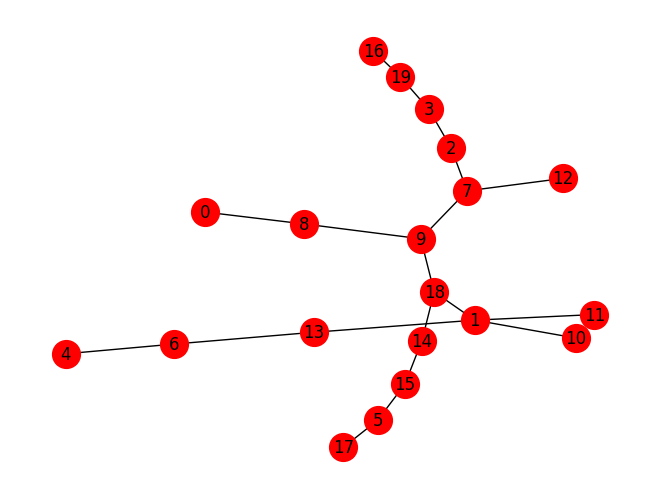

In [64]:
# Draw Kruskala karkas


k_karkas = nx.Graph()
k_karkas.add_edges_from(kruskala(G)[0])

nx.draw(k_karkas, node_color='red', 
        with_labels=True, 
        node_size=400)

------------------------------------------------------------------------------------------

---------------------------------

-----------------------------------------------------

## Prim's algorithm

In [65]:
mstp = tree.minimum_spanning_tree(G, algorithm="prim")


In [66]:
# nx.draw(mstp, node_color='lightblue', 
#         with_labels=True, 
#         node_size=700)

In [67]:
def sorting(pair):
    return G.adj[pair[0]][pair[1]]['weight']

def prima(G):
    sorted_coordinates = sorted(G.edges(), key=lambda pair:sorting(pair))

    vertex = G.nodes()

    start_vertex = 0
    used_vertex = [start_vertex]
    karkasP = []
    karkasP_weight = 0

    while True:
        if set(vertex) != set(used_vertex):
            for pair in sorted_coordinates:
                if (pair[0] in used_vertex and pair[1] not in used_vertex) or (pair[1] in used_vertex and pair[0] not in used_vertex):
                    if pair not in karkasP:
                        karkasP.append(pair)
                        karkasP_weight += G.adj[pair[0]][pair[1]]['weight']
                        used_vertex.append(pair[0])
                        used_vertex.append(pair[1])
                        break
        else:
            break
    return karkasP, karkasP_weight

prima(G)


([(0, 8),
  (8, 9),
  (7, 9),
  (2, 7),
  (2, 3),
  (3, 19),
  (9, 18),
  (1, 18),
  (1, 11),
  (14, 18),
  (14, 15),
  (5, 15),
  (5, 17),
  (1, 10),
  (1, 13),
  (6, 13),
  (4, 6),
  (16, 19),
  (7, 12)],
 -60)

Сортуємо ребра за вагою і починаємо йти від найменшої. Перебираємо ребра, і якщо виконується умова, то ребро тримає вершина, що є у списку використаних, а іншу точку ми ще не використовували, то додаємо ребро. Коли всі вершини є в списку, то закінчуємо.

## Порівняємо результат з результатом вбудованого алгоритма

In [68]:
# prima results

mstk.edges(data = True)
weight = 0
for el in mstk.edges(data = True):
    weight += el[2]['weight']

prima_karkas, prima_weight = prima(G)[0], prima(G)[1]

print(f'Вага за вбудованим:{weight}')
print(f'Вага за нашим:{prima_weight}')
print(f'Чи співпадає: {weight == prima_weight}')

Вага за вбудованим:-60
Вага за нашим:-60
Чи співпадає: True


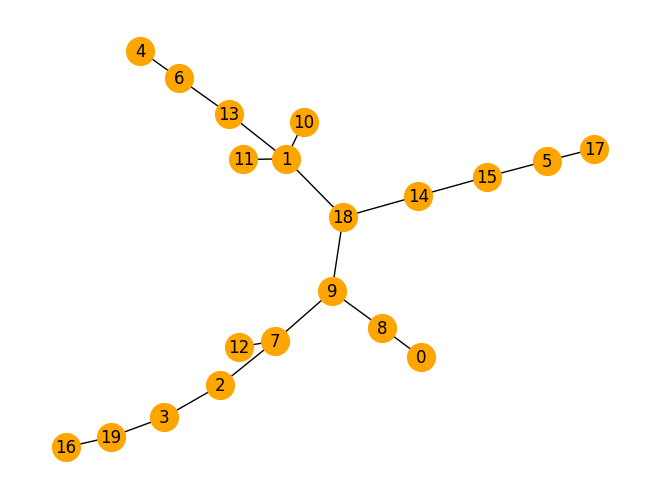

In [69]:
# Draw Prima karkas


p_karkas = nx.Graph()
p_karkas.add_edges_from(prima(G)[0])

nx.draw(p_karkas, node_color='orange', 
        with_labels=True, 
        node_size=400)

----

# Порівняння


## Ймовірність 1

In [70]:

import time
from tqdm import tqdm

100%|██████████| 10/10 [00:05<00:00,  1.83it/s]


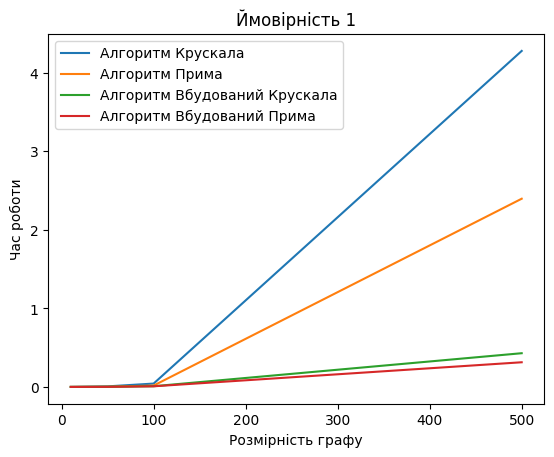

In [73]:

# Розмірність графу
graph_sizes = [10, 50, 100, 500]



algorithm1_times = []

algorithm2_times = [] 

algorithm3_times = []

algorithm4_times = []

for m in range(4):
    NUM_OF_ITERATIONS = round(100000 / int("1" + ("0" * (m+1))))
    time_taken = 0
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        
        # note that we should not measure time of graph creation
        G = gnp_random_connected_graph(graph_sizes[m], 1, False, False)
        
        start = time.time()
        kruskala(G)
        end = time.time()

        time_taken += end - start

    algorithm1_times.append(time_taken / NUM_OF_ITERATIONS)


for m in range(4):
    NUM_OF_ITERATIONS = round(100000 / int("1" + ("0" * (m+1))))
    time_taken = 0
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        
        # note that we should not measure time of graph creation
        G = gnp_random_connected_graph(graph_sizes[m], 1, False, False)
        
        start = time.time()
        prima(G)
        end = time.time()

        time_taken += end - start

    algorithm2_times.append(time_taken / NUM_OF_ITERATIONS)


for m in range(4):
    NUM_OF_ITERATIONS = round(100000 / int("1" + ("0" * (m+1))))
    time_taken = 0
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        
        # note that we should not measure time of graph creation
        G = gnp_random_connected_graph(graph_sizes[m], 1, False, False)
        
        start = time.time()
        mstk = tree.minimum_spanning_tree(G, algorithm="kruskal")
        end = time.time()

        time_taken += end - start

    algorithm3_times.append(time_taken / NUM_OF_ITERATIONS)

for m in range(4):
    NUM_OF_ITERATIONS = round(100000 / int("1" + ("0" * (m+1))))
    time_taken = 0
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        
        # note that we should not measure time of graph creation
        G = gnp_random_connected_graph(graph_sizes[m], 1, False, False)
        
        start = time.time()
        mstp = tree.minimum_spanning_tree(G, algorithm="prim")
        end = time.time()

        time_taken += end - start

    algorithm4_times.append(time_taken / NUM_OF_ITERATIONS)
    

plt.plot(graph_sizes, algorithm1_times, label='Алгоритм Крускала')
plt.plot(graph_sizes, algorithm2_times, label='Алгоритм Прима')
plt.plot(graph_sizes, algorithm3_times, label='Алгоритм Вбудований Крускала')
plt.plot(graph_sizes, algorithm4_times, label='Алгоритм Вбудований Прима')
plt.xlabel('Розмірність графу')
plt.ylabel('Час роботи')
plt.title('Ймовірність 1')
plt.legend()


plt.show()

На графах до 100 вершин розроблені нами алгоритми працюють дещо швидше, але цей час дуже не значний. На графах з 200-500 вершинами вже видно разюче відставання наших алгоритмів з середньою різницею 4 секунди. Алгоритм Прима є швидшим в обох випадках.

-----------------

## Ймовірність 0.5


100%|██████████| 10/10 [00:03<00:00,  3.20it/s]


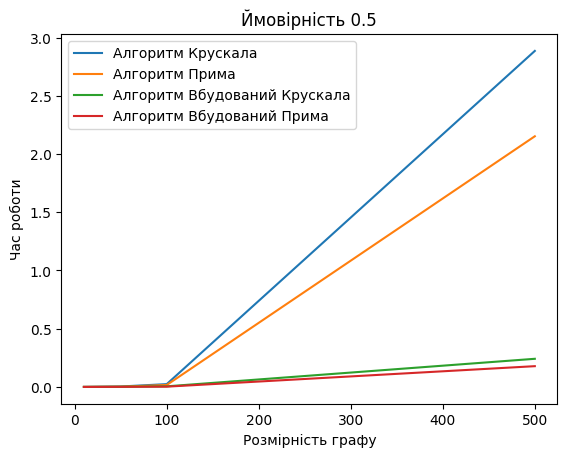

In [78]:

# Розмірність графу
graph_sizes = [10, 50, 100, 500]



algorithm1_times = []

algorithm2_times = [] 

algorithm3_times = []

algorithm4_times = []

for m in range(4):
    NUM_OF_ITERATIONS = round(100000 / int("1" + ("0" * (m+1))))
    time_taken = 0
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        
        # note that we should not measure time of graph creation
        G = gnp_random_connected_graph(graph_sizes[m], 0.5, False, False)
        
        start = time.time()
        kruskala(G)
        end = time.time()

        time_taken += end - start

    algorithm1_times.append(time_taken / NUM_OF_ITERATIONS)


for m in range(4):
    NUM_OF_ITERATIONS = round(100000 / int("1" + ("0" * (m+1))))
    time_taken = 0
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        
        # note that we should not measure time of graph creation
        G = gnp_random_connected_graph(graph_sizes[m], 0.5, False, False)
        
        start = time.time()
        prima(G)
        end = time.time()

        time_taken += end - start

    algorithm2_times.append(time_taken / NUM_OF_ITERATIONS)


for m in range(4):
    NUM_OF_ITERATIONS = round(100000 / int("1" + ("0" * (m+1))))
    time_taken = 0
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        
        # note that we should not measure time of graph creation
        G = gnp_random_connected_graph(graph_sizes[m], 0.5, False, False)
        
        start = time.time()
        mstk = tree.minimum_spanning_tree(G, algorithm="kruskal")
        end = time.time()

        time_taken += end - start

    algorithm3_times.append(time_taken / NUM_OF_ITERATIONS)

for m in range(4):
    NUM_OF_ITERATIONS = round(100000 / int("1" + ("0" * (m+1))))
    time_taken = 0
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        
        # note that we should not measure time of graph creation
        G = gnp_random_connected_graph(graph_sizes[m], 0.5, False, False)
        
        start = time.time()
        mstp = tree.minimum_spanning_tree(G, algorithm="prim")
        end = time.time()

        time_taken += end - start

    algorithm4_times.append(time_taken / NUM_OF_ITERATIONS)
    

plt.plot(graph_sizes, algorithm1_times, label='Алгоритм Крускала')
plt.plot(graph_sizes, algorithm2_times, label='Алгоритм Прима')
plt.plot(graph_sizes, algorithm3_times, label='Алгоритм Вбудований Крускала')
plt.plot(graph_sizes, algorithm4_times, label='Алгоритм Вбудований Прима')
plt.xlabel('Розмірність графу')
plt.ylabel('Час роботи')
plt.title('Ймовірність 0.5')
plt.legend()


plt.show()

-----------------------

Тут знову ситуація, що на маленьких графах наші алгоритми складають конкуренцію вбудованим, але з 100 вершин почають відставати. Проте час зменшився через ймовірність. Тепер наш алгоритм виконується в середньому довше на 2.5 секунди. І знову Прима має перевагу

## Ймовірність 0.2


100%|██████████| 10/10 [00:01<00:00,  6.98it/s]


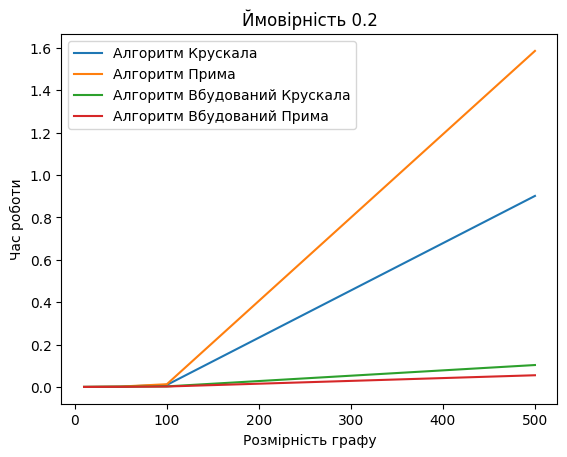

In [80]:

# Розмірність графу
graph_sizes = [10, 50, 100, 500]



algorithm1_times = []

algorithm2_times = [] 

algorithm3_times = []

algorithm4_times = []

for m in range(4):
    NUM_OF_ITERATIONS = round(100000 / int("1" + ("0" * (m+1))))
    time_taken = 0
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        
        # note that we should not measure time of graph creation
        G = gnp_random_connected_graph(graph_sizes[m], 0.2, False, False)
        
        start = time.time()
        kruskala(G)
        end = time.time()

        time_taken += end - start

    algorithm1_times.append(time_taken / NUM_OF_ITERATIONS)


for m in range(4):
    NUM_OF_ITERATIONS = round(100000 / int("1" + ("0" * (m+1))))
    time_taken = 0
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        
        # note that we should not measure time of graph creation
        G = gnp_random_connected_graph(graph_sizes[m], 0.2, False, False)
        
        start = time.time()
        prima(G)
        end = time.time()

        time_taken += end - start

    algorithm2_times.append(time_taken / NUM_OF_ITERATIONS)


for m in range(4):
    NUM_OF_ITERATIONS = round(100000 / int("1" + ("0" * (m+1))))
    time_taken = 0
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        
        # note that we should not measure time of graph creation
        G = gnp_random_connected_graph(graph_sizes[m], 0.2, False, False)
        
        start = time.time()
        mstk = tree.minimum_spanning_tree(G, algorithm="kruskal")
        end = time.time()

        time_taken += end - start

    algorithm3_times.append(time_taken / NUM_OF_ITERATIONS)

for m in range(4):
    NUM_OF_ITERATIONS = round(100000 / int("1" + ("0" * (m+1))))
    time_taken = 0
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        
        # note that we should not measure time of graph creation
        G = gnp_random_connected_graph(graph_sizes[m], 0.2, False, False)
        
        start = time.time()
        mstp = tree.minimum_spanning_tree(G, algorithm="prim")
        end = time.time()

        time_taken += end - start

    algorithm4_times.append(time_taken / NUM_OF_ITERATIONS)
    

plt.plot(graph_sizes, algorithm1_times, label='Алгоритм Крускала')
plt.plot(graph_sizes, algorithm2_times, label='Алгоритм Прима')
plt.plot(graph_sizes, algorithm3_times, label='Алгоритм Вбудований Крускала')
plt.plot(graph_sizes, algorithm4_times, label='Алгоритм Вбудований Прима')
plt.xlabel('Розмірність графу')
plt.ylabel('Час роботи')
plt.title('Ймовірність 0.2')
plt.legend()


plt.show()

Час ще зменшився, бо ймовірність ще менша і кількість ребер, які треба перевірити, зменшується. Тепер різниця у часі всього 1.4 секунди. Вбудований алгоритм Прима знову працює найшвидше, проте розробленим нами Прима тепер займає найбільший час.

# Висновки: Крускал VS Прима

Бачимо, що на ймовірностях 1 та 0.5 алгоритм Прима працює швидше, ніж Крускала. Проте на ймовірності 0.2 він починає працювати значно повільніше.
Наші алгоритми працюють повільніше, ніж вбудовані, проте теж показують непогані результати на графах до 100 вершин. Тобто розробленому нами алгоритму Прима байдуже скільки ребер є, він працює приблизно на однаковий час. А Крускала пришвидшується пропорційно зменшенню ймовірності.

---------------------

---

-----

# Task 2


## Белмана-Форда

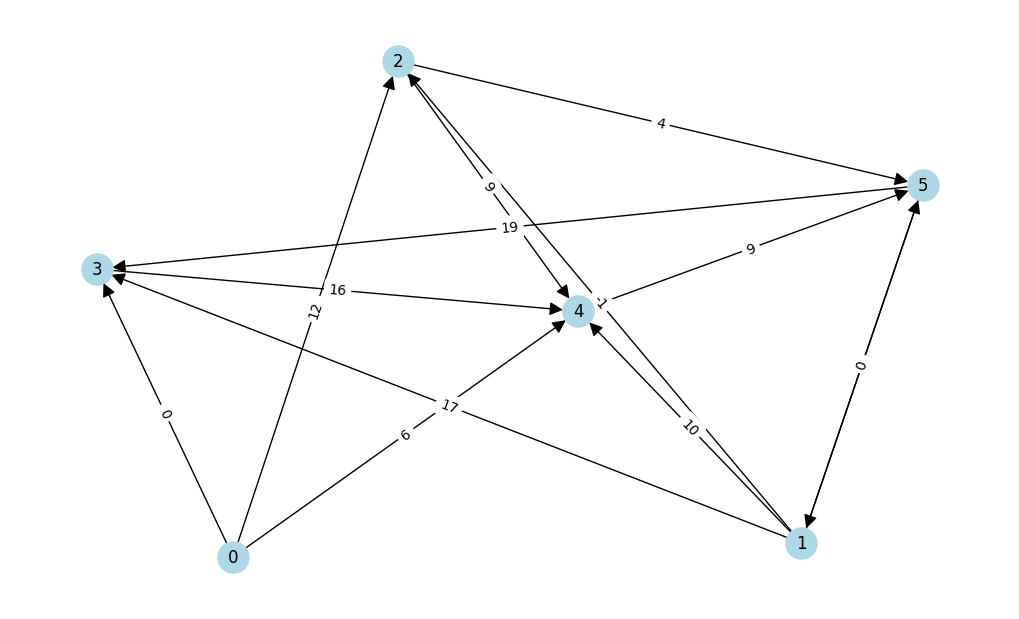

In [89]:
G = gnp_random_connected_graph(6, 0.7, True, True)

In [93]:
from networkx.algorithms import bellman_ford_predecessor_and_distance

# pred is a dictionary of predecessors, dist is a dictionary of distances
def build_b_f(G):
    try:
        pred, dist = bellman_ford_predecessor_and_distance(G, 0)
        for k, v in dist.items():
            return f"Distance to {k}:", v
    except:
        return "Negative cycle detected"

In [94]:
def graph_to_matrix(graph: 'G') -> list[list]:
    res = []
    graph_edges = {(el_1, el_2): weight['weight'] for el_1, el_2, weight in graph.edges(data=True)}
    graph_nodes = graph.nodes
    for el_y in graph_nodes:
        res_app = []
        for el_x in graph_nodes:
            if (el_y, el_x) in graph_edges:
                res_app.append(graph_edges[(el_y, el_x)])
            else:
                res_app.append(float('inf'))
        res.append(res_app)
    return res


graph_to_matrix(G)

[[inf, inf, 12, 0, 6, inf],
 [inf, inf, -1, 17, 10, 8],
 [inf, inf, inf, inf, 9, 4],
 [inf, inf, inf, inf, 16, inf],
 [inf, inf, inf, inf, inf, 9],
 [inf, 0, inf, 19, inf, inf]]

In [1]:
def bellman_ford(graph, start_point = None):
    graph_nodes = list(graph.nodes)
    graph_edges_data = list(graph.edges(data=True))
    inf = float('inf')
    dct_ = {}
    if nx.is_directed(graph):
        for el_1, el_2, weight in graph_edges_data:
            if el_1 not in dct_:
                dct_[el_1] = [(el_2, weight['weight'])]
            else:
                dct_[el_1] += [(el_2, weight['weight'])]
    else:
        for el_1, el_2, weight in graph_edges_data:
            if el_1 not in dct_:
                dct_[el_1] = [(el_2, weight['weight'])]
            else:
                dct_[el_1] += [(el_2, weight['weight'])]
            if el_2 not in dct_:
                dct_[el_2] = [(el_1, weight['weight'])]
            else:
                dct_[el_2] += [(el_1, weight['weight'])]
            
    if start_point is None or start_point not in graph_nodes:
        start_point = 0
    table = [[inf].copy()*(len(graph_nodes)-1)]
    table_in = [[inf].copy()*len(graph_nodes)]
    table[0].insert(graph_nodes[start_point], 0)
    while len(table) <= 2 or (len(table) <= len(graph_nodes) and table[-1] != table[-2]):
        table_app = table[-1].copy()
        table_in_app = table_in[-1].copy()
        for node in graph_nodes:
            if table[-1][node] != inf and node in dct_:
                for el in dct_[node]:
                    if el[1] + table[-1][node] < table_app[el[0]]:
                        table_app[el[0]] = el[1] + table[-1][node]
                        table_in_app[el[0]] = node
        if table_app[0] < 0:
            return "Negative cycle detected"

        table.append(table_app)
        table_in.append(table_in_app)
    if table[-1] != table[-2]:
        return "Negative cycle detected"
        
        
    return table, table_in


In [105]:
bellman_ford(G)

([[0, inf, inf, inf, inf, inf],
  [0, inf, 12, 0, 6, inf],
  [0, inf, 12, 0, 6, 15],
  [0, 15, 12, 0, 6, 15],
  [0, 15, 12, 0, 6, 15]],
 [[inf, inf, inf, inf, inf, inf],
  [inf, inf, 0, 0, 0, inf],
  [inf, inf, 0, 0, 0, 4],
  [inf, 5, 0, 0, 0, 4],
  [inf, 5, 0, 0, 0, 4]])

Алгоритм Белмана-Форда. Повертає матрицю відстаней та матрицю індексів

----

## Флойда-Воршалла

In [96]:
from networkx.algorithms import floyd_warshall_predecessor_and_distance

In [104]:
def build_f_w(G):
    try:
        pred, dist = floyd_warshall_predecessor_and_distance(G) 
        for k, v in dist.items():
            return f"Distances with {k} source:", dict(v)
    except:
        return "Negative cycle detected"

build_f_w(G)

('Distances with 0 source:', {0: 0, 2: 12, 3: 0, 4: 6, 1: 15, 5: 15})

In [4]:
def floyd_warshall(graph):
    graph_edges_data = {}
    if graph.is_directed():
        graph_edges_data = {(el_1, el_2): weight['weight'] for el_1, el_2, weight in list(graph.edges(data=True))}
    else:
        for el_1, el_2, weight in list(graph.edges(data=True)):
            graph_edges_data[(el_1, el_2)] = weight['weight']
            graph_edges_data[(el_2, el_1)] = weight['weight']

    inf = float('inf')
    nodes = graph.nodes
    table = []
    for el_y in nodes:
        table_app = []
        for el_x in nodes:
            if el_x == el_y:
                table_app.append(0)
            elif (el_y, el_x) not in graph_edges_data:
                table_app.append(inf)
            else:
                table_app.append(graph_edges_data[(el_y, el_x)])
        table.append(table_app)

    table_in = [[node]*ind+[-1]+[node]*(len(nodes)-ind-1) for ind, node in enumerate(nodes)]
    for iteration in range(len(nodes)):
        row = table[iteration]
        col = [row[iteration] for row in table]
        for ind_y, el_y in enumerate(table):
            if ind_y != iteration and col[ind_y] != inf:
                for ind_x, el_x in enumerate(el_y):
                    if row[ind_x] != inf and ind_x != iteration and el_x > row[ind_x] + col[ind_y]:
                        table[ind_y][ind_x] = row[ind_x] + col[ind_y]
                        table_in[ind_y][ind_x] = table_in[iteration][ind_x]
        if any(0 != el[ind] for ind, el in enumerate(table)):
            return "Negative cycle detected"
    return table, table_in
                        

In [103]:
floyd_warshall(G)

([[0, 15, 12, 0, 6, 15],
  [inf, 0, -1, 17, 8, 3],
  [inf, 4, 0, 21, 9, 4],
  [inf, 25, 24, 0, 16, 25],
  [inf, 9, 8, 26, 0, 9],
  [inf, 0, -1, 17, 8, 0]],
 [[-1, 5, 0, 0, 0, 4],
  [1, -1, 1, 1, 2, 2],
  [2, 5, -1, 1, 2, 2],
  [3, 5, 1, -1, 3, 4],
  [4, 5, 1, 1, -1, 4],
  [5, 5, 1, 1, 2, -1]])

## Порівнюємо алгоритми 


### Ймовірність 1

100%|██████████| 10/10 [01:28<00:00,  8.83s/it]


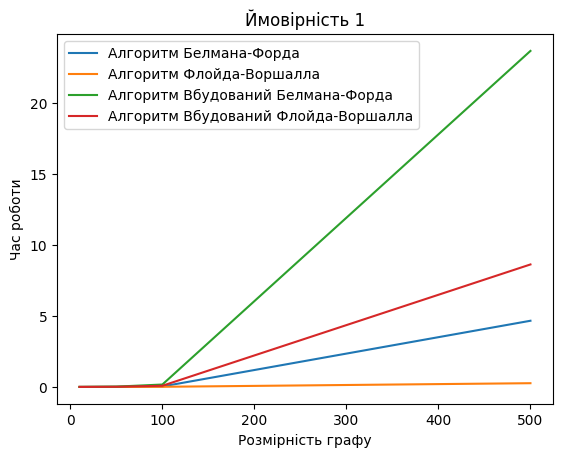

In [107]:

# Розмірність графу
graph_sizes = [10, 50, 100, 500]



algorithm1_times = []

algorithm2_times = [] 

algorithm3_times = []

algorithm4_times = []

for m in range(4):
    NUM_OF_ITERATIONS = round(100000 / int("1" + ("0" * (m+1))))
    time_taken = 0
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        
        # note that we should not measure time of graph creation
        G = gnp_random_connected_graph(graph_sizes[m], 1, True, False)
        
        start = time.time()
        bellman_ford(G)
        end = time.time()

        time_taken += end - start

    algorithm1_times.append(time_taken / NUM_OF_ITERATIONS)


for m in range(4):
    NUM_OF_ITERATIONS = round(100000 / int("1" + ("0" * (m+1))))
    time_taken = 0
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        
        # note that we should not measure time of graph creation
        G = gnp_random_connected_graph(graph_sizes[m], 1, True, False)
        
        start = time.time()
        floyd_warshall(G)
        end = time.time()

        time_taken += end - start

    algorithm2_times.append(time_taken / NUM_OF_ITERATIONS)


for m in range(4):
    NUM_OF_ITERATIONS = round(100000 / int("1" + ("0" * (m+1))))
    time_taken = 0
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        
        # note that we should not measure time of graph creation
        G = gnp_random_connected_graph(graph_sizes[m], 1, True, False)
        
        start = time.time()
        build_f_w(G)
        end = time.time()

        time_taken += end - start

    algorithm3_times.append(time_taken / NUM_OF_ITERATIONS)

for m in range(4):
    NUM_OF_ITERATIONS = round(100000 / int("1" + ("0" * (m+1))))
    time_taken = 0
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        
        # note that we should not measure time of graph creation
        G = gnp_random_connected_graph(graph_sizes[m], 1, True, False)
        
        start = time.time()
        build_b_f(G)
        end = time.time()

        time_taken += end - start

    algorithm4_times.append(time_taken / NUM_OF_ITERATIONS)
    

plt.plot(graph_sizes, algorithm1_times, label='Алгоритм Белмана-Форда')
plt.plot(graph_sizes, algorithm2_times, label='Алгоритм Флойда-Воршалла')
plt.plot(graph_sizes, algorithm3_times, label='Алгоритм Вбудований Белмана-Форда')
plt.plot(graph_sizes, algorithm4_times, label='Алгоритм Вбудований Флойда-Воршалла')
plt.xlabel('Розмірність графу')
plt.ylabel('Час роботи')
plt.title('Ймовірність 1')
plt.legend()


plt.show()

Аналізуючи графік бачимо, що розроблені алгоритми працюють значно швидше. Вбудованим треба близько 10 та 25 секунд, а розробленим 2 та 5 секунд на 500 вершинах. Дуже гарні результати

У вбудованих перемагає Флойда-Воршалла. У розроблених теж. Отже він працює швидше

### Ймовірність 0.5

100%|██████████| 10/10 [00:50<00:00,  5.05s/it]


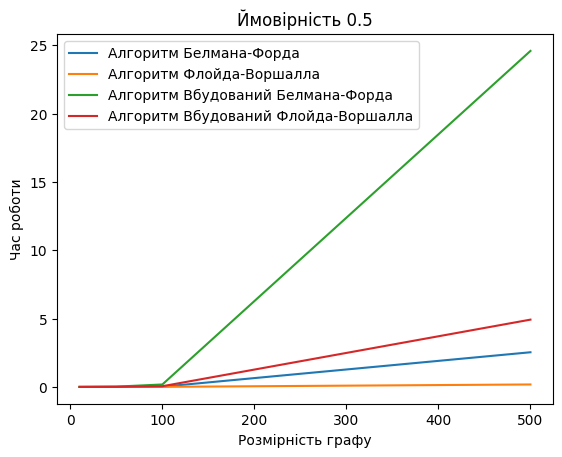

In [108]:

# Розмірність графу
graph_sizes = [10, 50, 100, 500]



algorithm1_times = []

algorithm2_times = [] 

algorithm3_times = []

algorithm4_times = []

for m in range(4):
    NUM_OF_ITERATIONS = round(100000 / int("1" + ("0" * (m+1))))
    time_taken = 0
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        
        # note that we should not measure time of graph creation
        G = gnp_random_connected_graph(graph_sizes[m], 0.5, True, False)
        
        start = time.time()
        bellman_ford(G)
        end = time.time()

        time_taken += end - start

    algorithm1_times.append(time_taken / NUM_OF_ITERATIONS)


for m in range(4):
    NUM_OF_ITERATIONS = round(100000 / int("1" + ("0" * (m+1))))
    time_taken = 0
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        
        # note that we should not measure time of graph creation
        G = gnp_random_connected_graph(graph_sizes[m], 0.5, True, False)
        
        start = time.time()
        floyd_warshall(G)
        end = time.time()

        time_taken += end - start

    algorithm2_times.append(time_taken / NUM_OF_ITERATIONS)


for m in range(4):
    NUM_OF_ITERATIONS = round(100000 / int("1" + ("0" * (m+1))))
    time_taken = 0
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        
        # note that we should not measure time of graph creation
        G = gnp_random_connected_graph(graph_sizes[m], 0.5, True, False)
        
        start = time.time()
        build_f_w(G)
        end = time.time()

        time_taken += end - start

    algorithm3_times.append(time_taken / NUM_OF_ITERATIONS)

for m in range(4):
    NUM_OF_ITERATIONS = round(100000 / int("1" + ("0" * (m+1))))
    time_taken = 0
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        
        # note that we should not measure time of graph creation
        G = gnp_random_connected_graph(graph_sizes[m], 0.5, True, False)
        
        start = time.time()
        build_b_f(G)
        end = time.time()

        time_taken += end - start

    algorithm4_times.append(time_taken / NUM_OF_ITERATIONS)
    

plt.plot(graph_sizes, algorithm1_times, label='Алгоритм Белмана-Форда')
plt.plot(graph_sizes, algorithm2_times, label='Алгоритм Флойда-Воршалла')
plt.plot(graph_sizes, algorithm3_times, label='Алгоритм Вбудований Белмана-Форда')
plt.plot(graph_sizes, algorithm4_times, label='Алгоритм Вбудований Флойда-Воршалла')
plt.xlabel('Розмірність графу')
plt.ylabel('Час роботи')
plt.title('Ймовірність 0.5')
plt.legend()


plt.show()

Тут наші алгоритми теж перемагають! Зменшилася ймовірність і зменшився час, хоча Флойда-Воршалла досі швидший. Різниця між нашим та вбудованим всього всього 3 секунди, в той час як між алгоритмами Белмана-Форда аж 22 секунди.

### Ймовірність 0.2

100%|██████████| 10/10 [00:33<00:00,  3.31s/it]


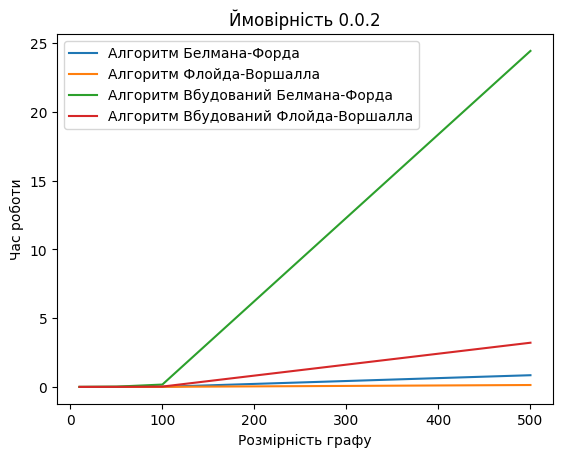

In [109]:

# Розмірність графу
graph_sizes = [10, 50, 100, 500]



algorithm1_times = []

algorithm2_times = [] 

algorithm3_times = []

algorithm4_times = []

for m in range(4):
    NUM_OF_ITERATIONS = round(100000 / int("1" + ("0" * (m+1))))
    time_taken = 0
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        
        # note that we should not measure time of graph creation
        G = gnp_random_connected_graph(graph_sizes[m], 0.2, True, False)
        
        start = time.time()
        bellman_ford(G)
        end = time.time()

        time_taken += end - start

    algorithm1_times.append(time_taken / NUM_OF_ITERATIONS)


for m in range(4):
    NUM_OF_ITERATIONS = round(100000 / int("1" + ("0" * (m+1))))
    time_taken = 0
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        
        # note that we should not measure time of graph creation
        G = gnp_random_connected_graph(graph_sizes[m], 0.2, True, False)
        
        start = time.time()
        floyd_warshall(G)
        end = time.time()

        time_taken += end - start

    algorithm2_times.append(time_taken / NUM_OF_ITERATIONS)


for m in range(4):
    NUM_OF_ITERATIONS = round(100000 / int("1" + ("0" * (m+1))))
    time_taken = 0
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        
        # note that we should not measure time of graph creation
        G = gnp_random_connected_graph(graph_sizes[m], 0.2, True, False)
        
        start = time.time()
        build_f_w(G)
        end = time.time()

        time_taken += end - start

    algorithm3_times.append(time_taken / NUM_OF_ITERATIONS)

for m in range(4):
    NUM_OF_ITERATIONS = round(100000 / int("1" + ("0" * (m+1))))
    time_taken = 0
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        
        # note that we should not measure time of graph creation
        G = gnp_random_connected_graph(graph_sizes[m], 0.2, True, False)
        
        start = time.time()
        build_b_f(G)
        end = time.time()

        time_taken += end - start

    algorithm4_times.append(time_taken / NUM_OF_ITERATIONS)
    

plt.plot(graph_sizes, algorithm1_times, label='Алгоритм Белмана-Форда')
plt.plot(graph_sizes, algorithm2_times, label='Алгоритм Флойда-Воршалла')
plt.plot(graph_sizes, algorithm3_times, label='Алгоритм Вбудований Белмана-Форда')
plt.plot(graph_sizes, algorithm4_times, label='Алгоритм Вбудований Флойда-Воршалла')
plt.xlabel('Розмірність графу')
plt.ylabel('Час роботи')
plt.title('Ймовірність 0.0.2')
plt.legend()


plt.show()

Знову вдубовані алгоритми програють. На алгоритм Белмана-Форма майже не діє зміна ймовірності. Флойд-Воршалл працює швидше зі зеншенням кількості ребер. Це відбувається, тому що зі збільшенням кількості вершин збільшується кількість негативних циклиів, а отже зменшується швидкість їхнього знаходження.

# Висновки: Белмана-Форда VS Флойда-Воршала

Бачимо, що алгоритм Флойда-Воршала завжди випереджає алгоритм Белмана-Форда. Хоча, чим менша ймовірність виникнення ребра, тим менший розрив між цими алгоритмами.
Наші алгоритми працюють швидше, ніж вбудовані, хоча на графах до 100 вершин показують майже ідентичні результати. Чому алгоритм Флойда-Воршала кращий за Белмана-Форда? На нашу думку, це пов'язано з тим, як швидко вони виявляють негативні цикли, адже під час іхніх перевірок ми виявили, що у графах більших за десять вершин кількість випадків трапляння негативних циклів значно зростає, до прикладу, коли ми тестували наші алгоритми на графах розміром 50 вершин та ймовірнстю 0.4, то нам трапилось близько 3-5 графів без негативних циклів, а загалом ітерацій було 1000. Наша реалізація алгоритму Флойда-Воршала є доволі хорошою, тому що ми перевіряємо(в рядку з any) наявність негативних циклів одразу після кожної ітерації, а от наша реалізація алгоритму Белмана-Форда має основну перевірку(є ще додаткова, яка перевіряє, чи відстань до початкової точки не стала від'ємною) лише наприкінці виконання алгоритму. Хоча навіть попри це, наша реалізація цих двох алгоритмів є швидшою, ніж у networkx.

---------------------

---------------------

----

### Отже найшвидшим з перших алгоритмів є алгоритм Прима. Він працює швидко на ймовірностях 0.4 - 1, а на 0.1 - 0.3 вже починає програвати Крускалу

### З двох інших алгоритмів швидшим є алгоритм Флойда-Воршалла. Його швидкість зменшується пропорційно з зменшенням ймовірності. 
### Алгоритм Белмана-Форда не зважає на ймовірність і зберігає повіньність у випадку вбудованого алгоритму. У нас він одразу вийшов швидким